In [1]:
import numpy as np

import matplotlib.pyplot as plt

### Part I: A Constrained Bi-objective Optimization Problem¶
https://pymoo.org/getting_started/part_1.html

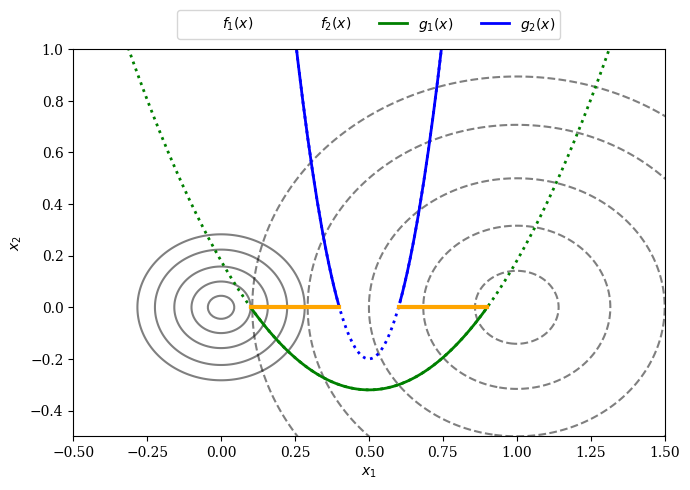

In [2]:
X1, X2 = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))

F1 = 100 * (X1**2 + X2**2)
F2 = (X1-1)**2 + X2**2

G1 = 2 * (X1[0] - 0.1) * (X1[0] - 0.9)
G2 = 20 * (X1[0] - 0.4) * (X1[0] - 0.6)

import matplotlib.pyplot as plt
plt.rc('font', family='serif')

levels = np.array([0.02, 0.1, 0.25, 0.5, 0.8])
plt.figure(figsize=(7, 5))
CS = plt.contour(X1, X2, F1, 10 * levels, colors='black', alpha=0.5)
CS.collections[0].set_label("$f_1(x)$")

CS = plt.contour(X1, X2, F2, levels, linestyles="dashed", colors='black', alpha=0.5)
CS.collections[0].set_label("$f_2(x)$")

plt.plot(X1[0], G1, linewidth=2.0, color="green", linestyle='dotted')
plt.plot(X1[0][G1<0], G1[G1<0], label="$g_1(x)$", linewidth=2.0, color="green")

plt.plot(X1[0], G2, linewidth=2.0, color="blue", linestyle='dotted')
plt.plot(X1[0][X1[0]>0.6], G2[X1[0]>0.6], label="$g_2(x)$",linewidth=2.0, color="blue")
plt.plot(X1[0][X1[0]<0.4], G2[X1[0]<0.4], linewidth=2.0, color="blue")

plt.plot(np.linspace(0.1,0.4,100), np.zeros(100),linewidth=3.0, color="orange")
plt.plot(np.linspace(0.6,0.9,100), np.zeros(100),linewidth=3.0, color="orange")

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=4, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()

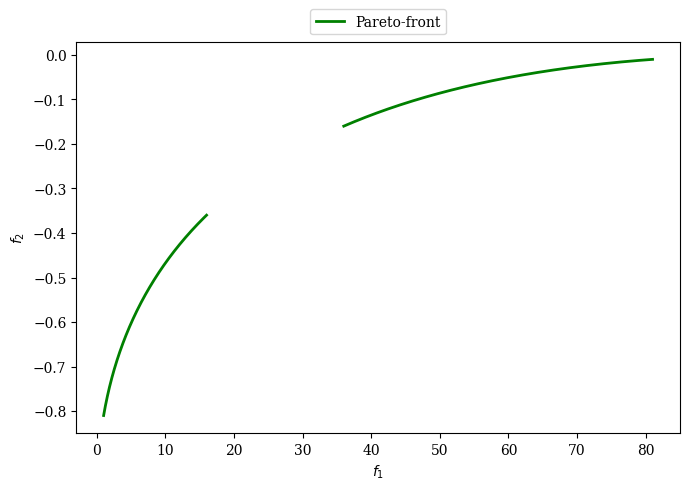

In [3]:
plt.figure(figsize=(7, 5))

f2 = lambda f1: - ((f1/100) ** 0.5 - 1)**2
F1_a, F1_b = np.linspace(1, 16, 300), np.linspace(36, 81, 300)
F2_a, F2_b = f2(F1_a), f2(F1_b)

plt.rc('font', family='serif')
plt.plot(F1_a,F2_a, linewidth=2.0, color="green", label="Pareto-front")
plt.plot(F1_b,F2_b, linewidth=2.0, color="green")

plt.xlabel("$f_1$")
plt.ylabel("$f_2$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=4, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()

### Part II: Find a Solution Set using Multi-objective Optimization¶
https://pymoo.org/getting_started/part_2.html

In [4]:
from pymoo.core.problem import ElementwiseProblem

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0]-1)**2 + x[1]**2

        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]


problem = MyProblem()

In [5]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling

algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)


In [6]:
from pymoo.termination import get_termination

termination = get_termination("n_gen", 40)



In [7]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

X = res.X
F = res.F

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       40 |      1 |  0.000000E+00 |  2.363992E+01 |             - |             -
     2 |       50 |      1 |  0.000000E+00 |  1.262978E+01 |  0.000000E+00 |             f
     3 |       60 |      2 |  0.000000E+00 |  5.3749132447 |  1.0000000000 |         ideal
     4 |       70 |      2 |  0.000000E+00 |  2.4309071542 |  0.000000E+00 |             f
     5 |       80 |      3 |  0.000000E+00 |  0.9326371456 |  0.0096178563 |         ideal
     6 |       90 |      3 |  0.000000E+00 |  0.1066499133 |  0.0601661450 |         ideal
     7 |      100 |      3 |  0.000000E+00 |  0.0092174421 |  0.000000E+00 |             f
     8 |      110 |      5 |  0.000000E+00 |  0.0010944863 |  0.2816759453 |         ideal
     9 |      120 |      6 |  0.000000E+00 |  0.000000E+00 |  0.0124399889 |             f
    10 |      130 |      9 |  0.000000E+00 |  0.000000E+00 |  0.0041045275 |         ideal

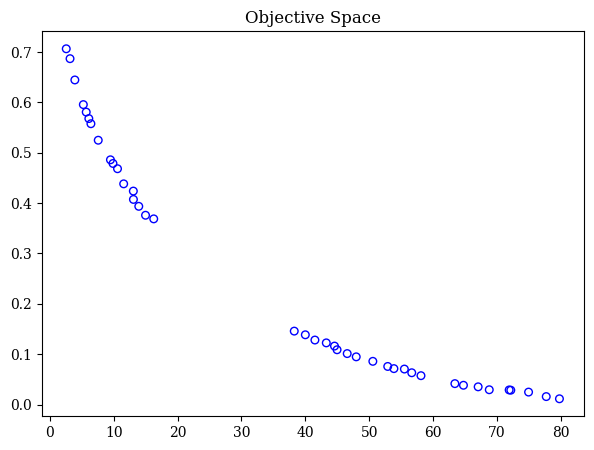

In [8]:
F = res.F
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

In [9]:
F

array([[2.58549487e+00, 7.06514757e-01],
       [7.97669169e+01, 1.14237101e-02],
       [3.82659190e+01, 1.45790051e-01],
       [1.62742682e+01, 3.68722290e-01],
       [3.93117280e+00, 6.44589959e-01],
       [7.59032662e+00, 5.24896564e-01],
       [5.80986866e+01, 5.73109609e-02],
       [5.25763256e+00, 5.95639216e-01],
       [6.34036466e+01, 4.15191478e-02],
       [3.17607589e+00, 6.86882749e-01],
       [9.50022564e+00, 4.86026397e-01],
       [1.15708157e+01, 4.38287157e-01],
       [5.05652106e+01, 8.57888741e-02],
       [7.49358983e+01, 2.47019853e-02],
       [7.77022837e+01, 1.57765735e-02],
       [6.44511747e+00, 5.57676614e-01],
       [1.06077443e+01, 4.68306027e-01],
       [4.79651386e+01, 9.47212997e-02],
       [6.87844750e+01, 2.93552243e-02],
       [1.39350127e+01, 3.93620370e-01],
       [3.99994951e+01, 1.38500691e-01],
       [1.49920067e+01, 3.75900643e-01],
       [4.14990950e+01, 1.28086412e-01],
       [6.70454632e+01, 3.51626375e-02],
       [1.308361

### Part III: Multi-Criteria Decision Making¶

https://pymoo.org/getting_started/part_3.html

In [10]:
fl = F.min(axis=0)
fu = F.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [2.5854948741290507, 79.76691689089954]
Scale f2: [0.011423710054466784, 0.7065147569542829]


In [11]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)

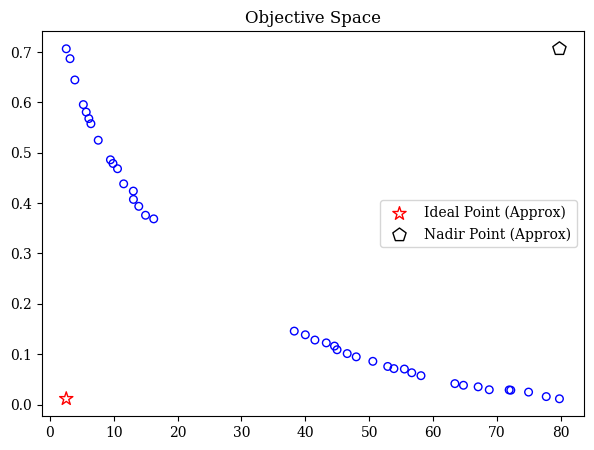

In [12]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.title("Objective Space")
plt.legend()
plt.show()

Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


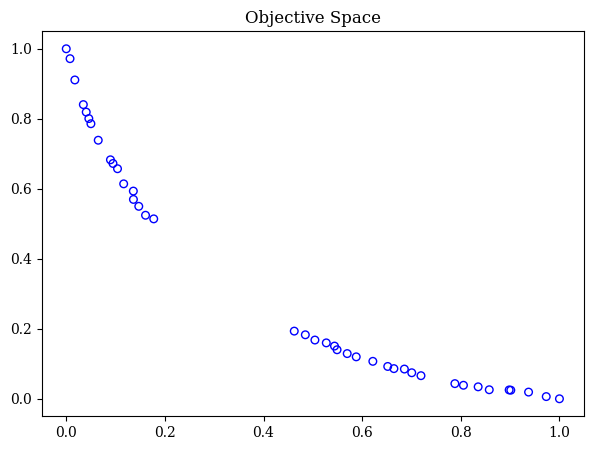

In [13]:
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()


#### Compromise Programming¶

In [14]:
weights = np.array([0.2, 0.8])

from pymoo.decomposition.asf import ASF

decomp = ASF()

i = decomp.do(nF, 1/weights).argmin()

i

33

Best regarding ASF: Point 
i = 33
F = [44.96614857  0.10877016]


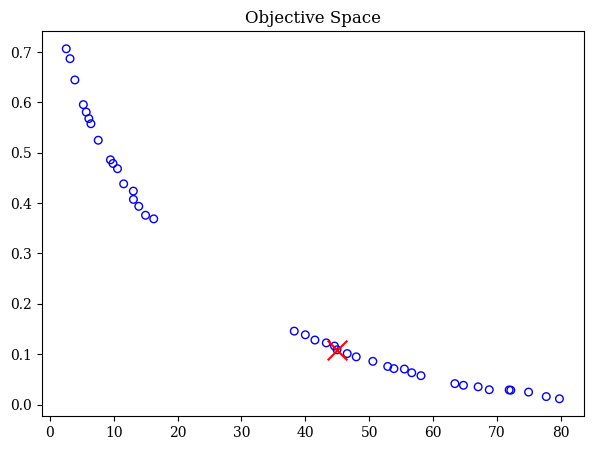

0.5491043386329421 0.14004849369837147
44.9661485653978 0.10877016415601011


In [15]:
print("Best regarding ASF: Point \ni = %s\nF = %s" % (i, F[i]))

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()


print(nF[33,0], nF[33,1])
print(F[33,0], F[33,1])

#### Pseudo-Weights¶

In [16]:
from pymoo.mcdm.pseudo_weights import PseudoWeights

i = PseudoWeights(weights).do(nF)

Best regarding Pseudo Weights: Point 
i = 8
F = [6.34036466e+01 4.15191478e-02]


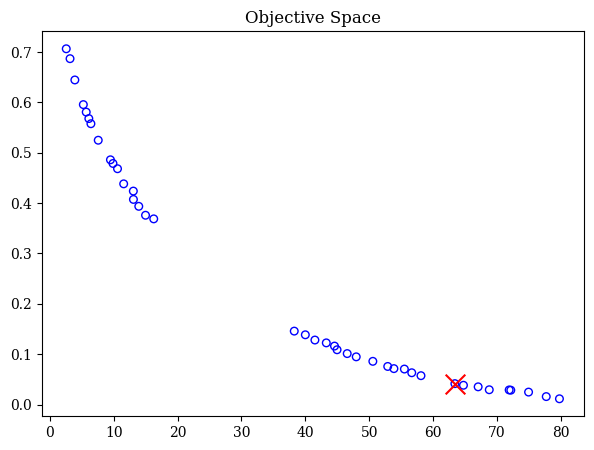

In [17]:
print("Best regarding Pseudo Weights: Point \ni = %s\nF = %s" % (i, F[i]))

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()

### Part IV: Analysis of Convergence¶
https://pymoo.org/getting_started/part_4.html

In [18]:
from pymoo.util.misc import stack

class MyTestProblem(MyProblem):

    def _calc_pareto_front(self, flatten=True, *args, **kwargs):
        f2 = lambda f1: ((f1/100) ** 0.5 - 1)**2
        F1_a, F1_b = np.linspace(1, 16, 300), np.linspace(36, 81, 300)
        F2_a, F2_b = f2(F1_a), f2(F1_b)

        pf_a = np.column_stack([F1_a, F2_a])
        pf_b = np.column_stack([F1_b, F2_b])

        return stack(pf_a, pf_b, flatten=flatten)

    def _calc_pareto_set(self, flatten=True, *args, **kwargs):
        x1_a = np.linspace(0.1, 0.4, 50)
        x1_b = np.linspace(0.6, 0.9, 50)
        x2 = np.zeros(50)

        a, b = np.column_stack([x1_a, x2]), np.column_stack([x1_b, x2])
        return stack(a,b, flatten=flatten)

problem = MyTestProblem()

In [19]:
pf_a, pf_b = problem.pareto_front(use_cache=False, flatten=False)

pf = problem.pareto_front(use_cache=False, flatten=True)

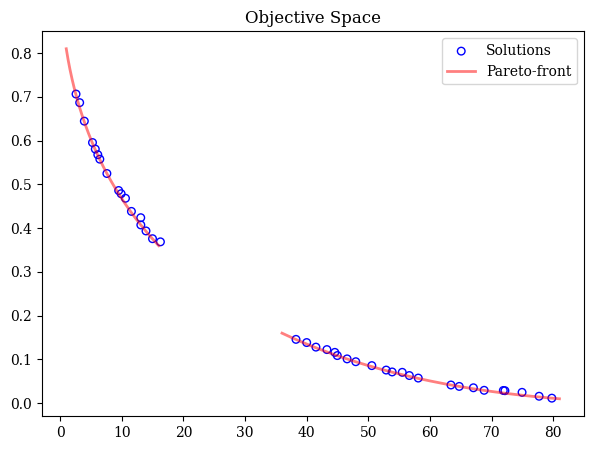

In [20]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='b', label="Solutions")
plt.plot(pf_a[:, 0], pf_a[:, 1], alpha=0.5, linewidth=2.0, color="red", label="Pareto-front")
plt.plot(pf_b[:, 0], pf_b[:, 1], alpha=0.5, linewidth=2.0, color="red")
plt.title("Objective Space")
plt.legend()
plt.show()



In [21]:
hist = res.history

n_evals = []             # corresponding number of function evaluations\
hist_F = []              # the objective space values in each generation
hist_cv = []             # constraint violation in each generation
hist_cv_avg = []         # average constraint violation in the whole population

for algo in hist:

    # store the number of function evaluations
    n_evals.append(algo.evaluator.n_eval)

    # retrieve the optimum from the algorithm
    opt = algo.opt

    # store the least contraint violation and the average in each population
    hist_cv.append(opt.get("CV").min())
    hist_cv_avg.append(algo.pop.get("CV").mean())

    # filter out only the feasible and append and objective space values
    feas = np.where(opt.get("feasible"))[0]
    hist_F.append(opt.get("F")[feas])

In [22]:
k = np.where(np.array(hist_cv) <= 0.0)[0].min()
print(f"At least one feasible solution in Generation {k} after {n_evals[k]} evaluations.")



At least one feasible solution in Generation 0 after 40 evaluations.


#### Constraint Satisfaction¶

Whole population feasible in Generation 8 after 120 evaluations.


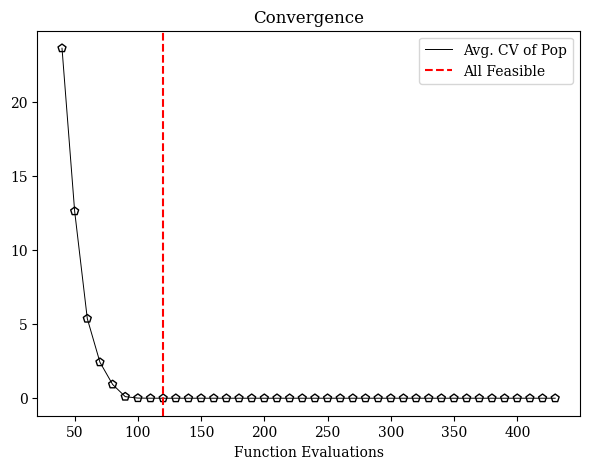

In [23]:
# replace this line by `hist_cv` if you like to analyze the least feasible optimal solution and not the population
vals = hist_cv_avg

k = np.where(np.array(vals) <= 0.0)[0].min()
print(f"Whole population feasible in Generation {k} after {n_evals[k]} evaluations.")

plt.figure(figsize=(7, 5))
plt.plot(n_evals, vals,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, vals,  facecolor="none", edgecolor='black', marker="p")
plt.axvline(n_evals[k], color="red", label="All Feasible", linestyle="--")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.legend()
plt.show()



#### Hypvervolume (HV)¶

In [24]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)

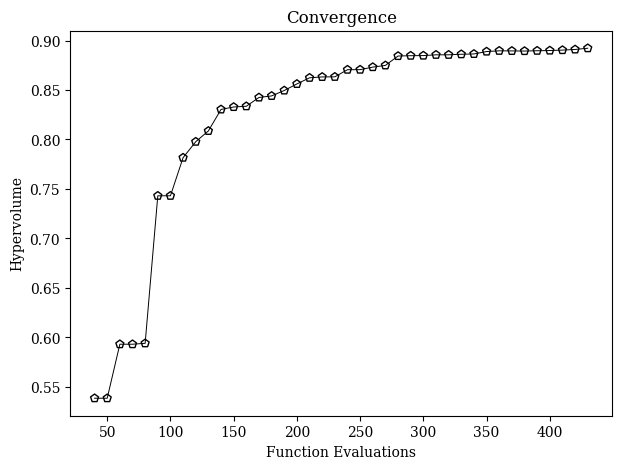

In [25]:
from pymoo.indicators.hv import Hypervolume

metric = Hypervolume(ref_point= np.array([1.1, 1.1]),
                     norm_ref_point=False,
                     zero_to_one=True,
                     ideal=approx_ideal,
                     nadir=approx_nadir)

hv = [metric.do(_F) for _F in hist_F]

plt.figure(figsize=(7, 5))
plt.plot(n_evals, hv,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, hv,  facecolor="none", edgecolor='black', marker="p")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("Hypervolume")
plt.show()



#### Running Metric¶

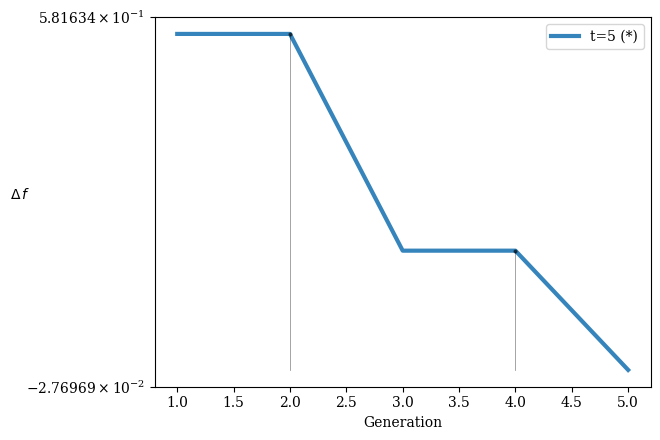

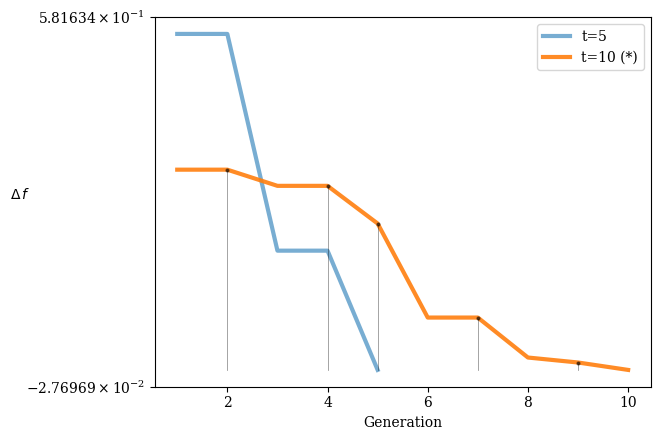

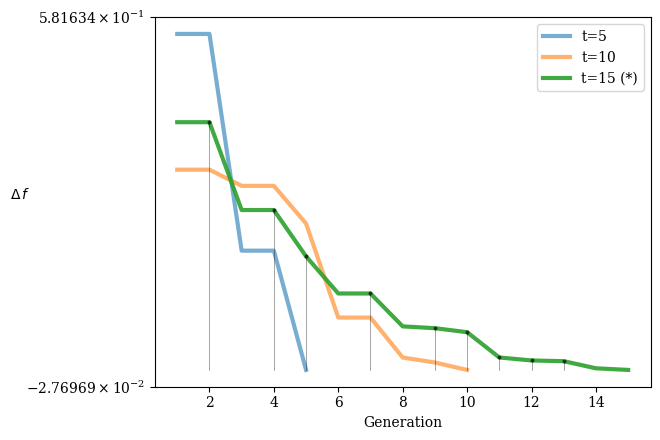

In [26]:
from pymoo.util.running_metric import RunningMetricAnimation

running = RunningMetricAnimation(delta_gen=5,
                        n_plots=3,
                        key_press=False,
                        do_show=True)

for algorithm in res.history[:15]:
    running.update(algorithm)

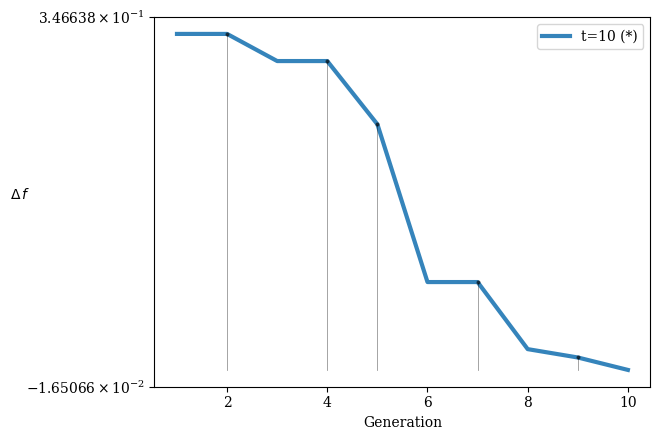

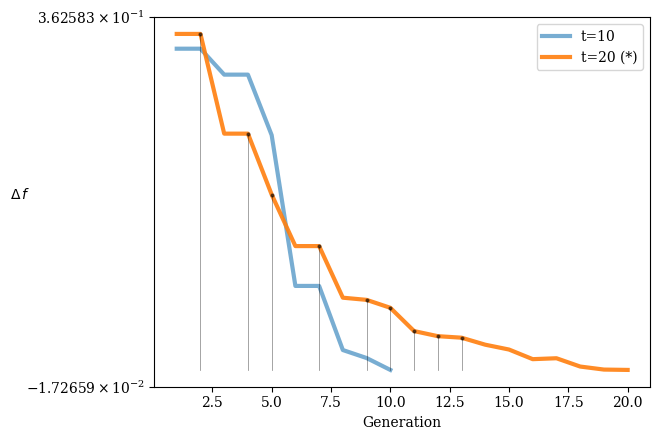

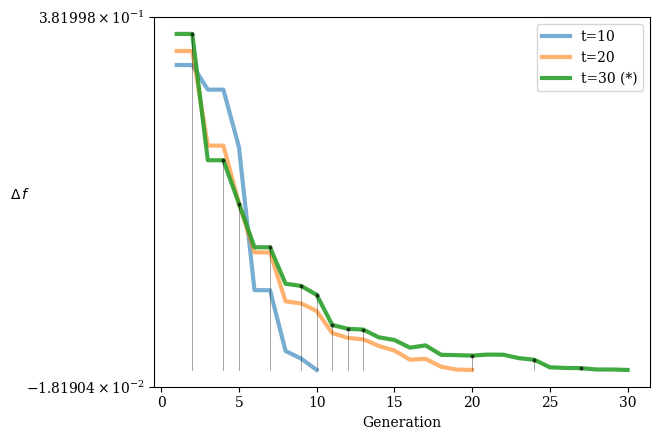

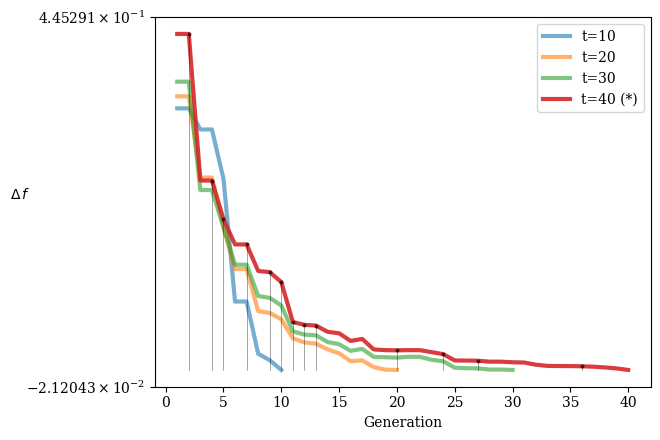

In [27]:
from pymoo.util.running_metric import RunningMetric

running = RunningMetricAnimation(delta_gen=10,
                        n_plots=4,
                        key_press=False,
                        do_show=True)

for algorithm in res.history:
    running.update(algorithm)



#### Pareto-front is known or approximated

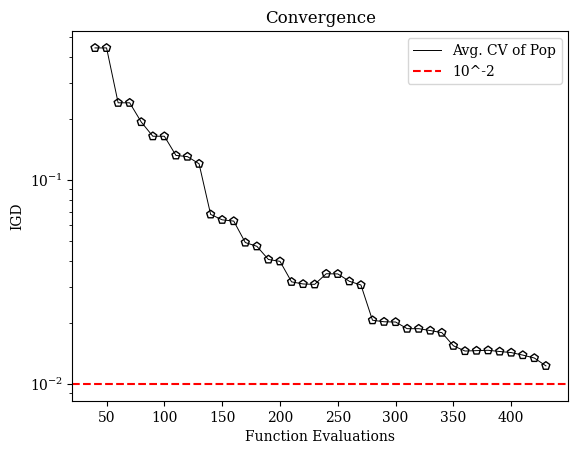

In [28]:
from pymoo.indicators.igd import IGD

metric = IGD(pf, zero_to_one=True)

igd = [metric.do(_F) for _F in hist_F]

plt.plot(n_evals, igd,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, igd,  facecolor="none", edgecolor='black', marker="p")
plt.axhline(10**-2, color="red", label="10^-2", linestyle="--")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("IGD")
plt.yscale("log")
plt.legend()
plt.show()

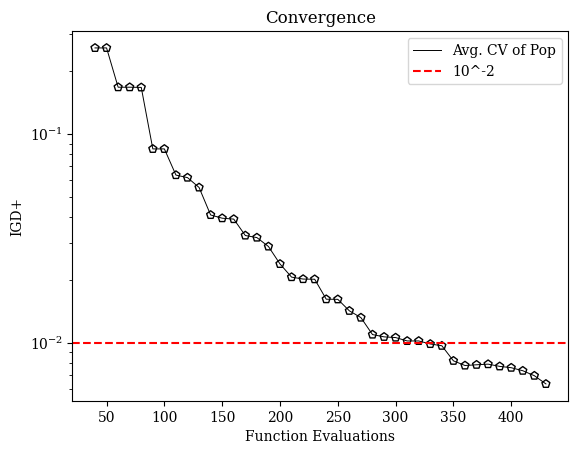

In [29]:
from pymoo.indicators.igd_plus import IGDPlus

metric = IGDPlus(pf, zero_to_one=True)

igd = [metric.do(_F) for _F in hist_F]

plt.plot(n_evals, igd,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, igd,  facecolor="none", edgecolor='black', marker="p")
plt.axhline(10**-2, color="red", label="10^-2", linestyle="--")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("IGD+")
plt.yscale("log")
plt.legend()
plt.show()

